1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib._version

<module 'matplotlib._version' from '/Users/ghalebju/anaconda3/lib/python3.10/site-packages/matplotlib/_version.py'>

In [3]:
%matplotlib inline

In [4]:
# DEFINING THE PATH

Path  = r'/Users/ghalebju/Desktop/Data Analysis Format/part 6/Zomato rest/Zomato Bangalore Restaurants analysis”/02 Data'

In [5]:
# IMPORTING DATA FRAME

df = pd.read_csv(os.path.join (Path,'Prepared Data' ,'Zomato_clean'))

2. Exploring relationships

In [6]:
#exploring columns names
df.columns

Index(['Unnamed: 0', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
#explorong values in "Unnamed: 0" column
df.head()

,Unnamed: 0,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,"4,1",775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,"4,1",787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,"3,8",918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,"3,7",88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,"3,8",166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
#dropping column "Unnamd: 0"
df = df.drop(columns = ['Unnamed: 0'])

In [9]:
# Create a correlation matrix using pandas

df.corr()

/var/folders/s5/185t061116b37123q55fx3hc0000gn/T/ipykernel_59987/1125721538.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,votes,approx_cost(for two people)
votes,1.000000,0.307866
approx_cost(for two people),0.307866,1.000000


/var/folders/s5/185t061116b37123q55fx3hc0000gn/T/ipykernel_59987/2845793157.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


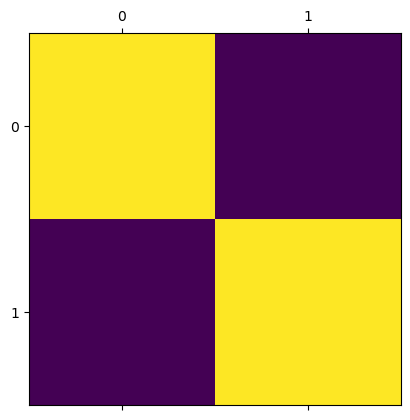

In [10]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

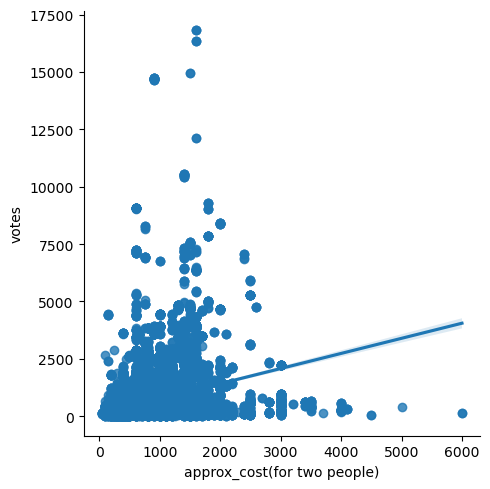

In [11]:
# Create a scatterplot for the "votes" and "approx_cost(for two people)" 

sns.lmplot(x = 'approx_cost(for two people)', y = 'votes', data = df)

Since we only have these two quantitative variables, it does not make much sense to prepare a pair plot.

we prepaired the scatterplot between (votes) and (approx_cost) to visualize the type of correlations they have

As we see, the correlation is not that strong between the two variables, but there is a positive correlation. meaning that the higher the approximate cost of dinner for two people, the more votes the restaurant gets.

We can also observe a very high concentration of the data for lower cost and lower votes

In [12]:
df.describe()

,votes,approx_cost(for two people)
count,23183.000000,23183.000000
mean,601.136997,755.820644
std,1115.055547,521.414285
min,0.000000,40.000000
25%,101.000000,400.000000
50%,221.000000,600.000000
75%,586.000000,1000.000000
max,16832.000000,6000.000000


<Axes: xlabel='votes', ylabel='Count'>

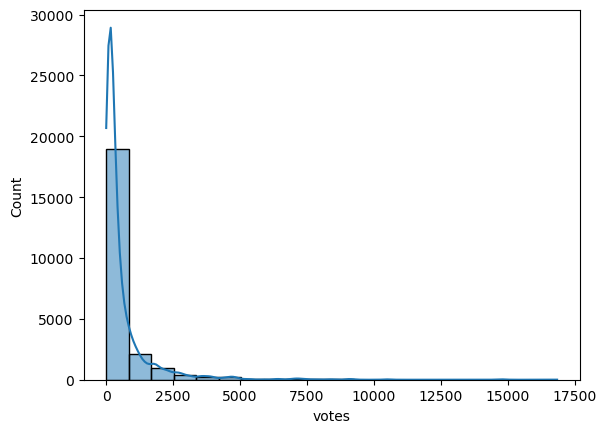

In [13]:
sns.histplot(df['votes'], bins = 20, kde = True)

In [14]:
df.loc[df['votes'] < 500, 'Votes category'] = 'Low votes'

In [15]:
df.loc[(df['votes'] >= 500) & (df['votes'] < 1500), 'Votes category'] = 'Middle votes'

In [16]:
df.loc[df['votes'] >= 1500, 'Votes category'] = 'High votes'

In [17]:
df['Votes category'].value_counts(dropna = False)

Low votes       16520
Middle votes     4329
High votes       2334
Name: Votes category, dtype: int64

In [18]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Votes category'],
      dtype='object')

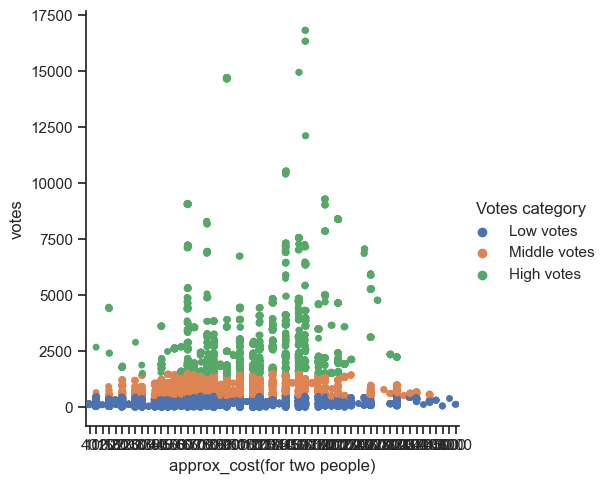

In [19]:
sns.set(style="ticks")
g = sns.catplot(x="approx_cost(for two people)", y="votes", hue="Votes category", data=df)

Our first obvservtion is that "Low votes" category is more or less destributed equaly accros the cost variable.we do see a small descreasing with high prices, but it is almost as if there is no material correlation between both variable.

The "Middle votes" category on the other hand does show a higher consentration in the middle part of the cost distribution leaving very few appearances on both the law prices end and the hight prices end.

Finally, when it comes to the "High votes" category, the concentration becomes stronger than the one we see in the "Middle votes" category to the point that there is zero votes above 1500 for the most expensive restaurants

In [20]:
df.loc[df['rate'] < '2', 'Rate category'] = 'Low rate'

In [21]:
df.loc[(df['rate'] >= '2') & (df['rate'] < '4'), 'Rate category'] = 'Middle rate'

In [22]:
df.loc[df['rate'] >= '4', 'Rate category'] = 'High rate'

In [23]:
df['Rate category'].value_counts(dropna = False)

High rate      11891
Middle rate    11287
Low rate           5
Name: Rate category, dtype: int64

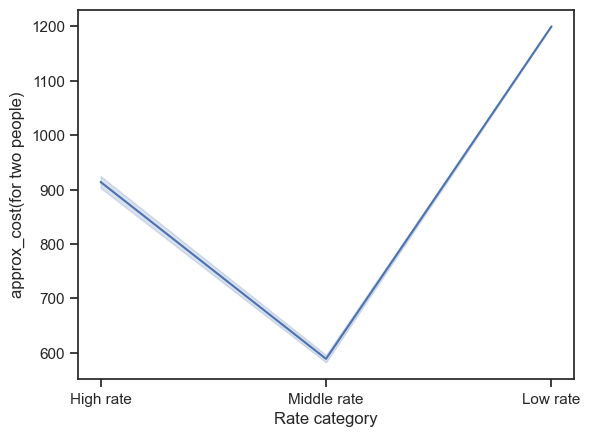

In [24]:
line = sns.lineplot(data = df, x = 'Rate category',y = 'approx_cost(for two people)')

Is there a correlation between the approximate cost and number of votes?
as we mentioned before, we were able to find from the scatterplot between these variable that there is a positive correlation between them but it is not very strong.

we will get more into details in that relationship and include more variables in our upcoming publications.

hypothesis: "people tend to give more votes when the cost gets higher up to a point where the price factor (being very expensive) starts to effect how people votes and they tend to give lower votes"